### Imports and setting up file locations within variables

In [0]:
import numpy as np 
from sklearn.utils import shuffle

from pandas.io.parsers import read_csv

In [0]:
FTRAIN = '/content/training.csv'

FTEST = '/content/test.csv'

FIdLookup = '/content/IdLookupTable.csv'

In [48]:
FTRAIN

'/content/training.csv'

### Displaying data in the files

In [49]:
read_csv(FTRAIN).head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [50]:
read_csv(FTEST).head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [51]:
read_csv(FIdLookup).head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


### Some general function Definitions
#### Plotting and loading functions

In [0]:
import os

In [0]:
def plot_sample(X,y,axs):
    '''
    kaggle picture is 96 by 96
    y is rescaled to range between -1 and 1
    '''
    
    axs.imshow(X.reshape(96,96),cmap="gray")
    axs.scatter(48*y[0::2]+ 48,48*y[1::2]+ 48)
    
def load(test=False, cols=None):
    """
    load test/train data
    cols : a list containing landmark label names.
           If this is specified, only the subset of the landmark labels are 
           extracted. for example, cols could be:
           
          [left_eye_center_x, left_eye_center_y]
            
    return: 
    X: 2-d numpy array (Nsample, Ncol*Nrow)
    y: 2-d numpy array (Nsample, Nlandmarks*2) 
       In total there are 15 landmarks. 
       As x and y coordinates are recorded, u.shape = (Nsample,30)
       
    """

    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname)) 

    
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  
        df = df[list(cols) + ['Image']]

    myprint = df.count()
    myprint = myprint.reset_index()
    print(myprint)  
    ## row with at least one NA columns are removed!
    df = df.dropna()  
    

    X = np.vstack(df['Image'].values) / 255.  # changes valeus between 0 and 1
    X = X.astype(np.float32)

    if not test:  # labels only exists for the training data
        ## standardization of the response
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # y values are between [-1,1]
        X, y = shuffle(X, y, random_state=42)  # shuffle data
        y = y.astype(np.float32)
    else:
        y = None
    
    
    return X, y

def plot_loss(hist,name,plt,RMSE_TF=False):
    '''
    RMSE_TF: if True, then RMSE is plotted with original scale 
    '''
    loss = hist['loss']
    val_loss = hist['val_loss']
    if RMSE_TF:
        loss = np.sqrt(np.array(loss))*48 
        val_loss = np.sqrt(np.array(val_loss))*48 
        
    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val:"+name)

### Load the data 

In [54]:
X, y = load()

                        index     0
0           left_eye_center_x  7039
1           left_eye_center_y  7039
2          right_eye_center_x  7036
3          right_eye_center_y  7036
4     left_eye_inner_corner_x  2271
5     left_eye_inner_corner_y  2271
6     left_eye_outer_corner_x  2267
7     left_eye_outer_corner_y  2267
8    right_eye_inner_corner_x  2268
9    right_eye_inner_corner_y  2268
10   right_eye_outer_corner_x  2268
11   right_eye_outer_corner_y  2268
12   left_eyebrow_inner_end_x  2270
13   left_eyebrow_inner_end_y  2270
14   left_eyebrow_outer_end_x  2225
15   left_eyebrow_outer_end_y  2225
16  right_eyebrow_inner_end_x  2270
17  right_eyebrow_inner_end_y  2270
18  right_eyebrow_outer_end_x  2236
19  right_eyebrow_outer_end_y  2236
20                 nose_tip_x  7049
21                 nose_tip_y  7049
22        mouth_left_corner_x  2269
23        mouth_left_corner_y  2269
24       mouth_right_corner_x  2270
25       mouth_right_corner_y  2270
26     mouth_center_top_lip_

In [55]:
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

X.shape == (2140, 9216); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == -0.920; y.max == 0.996


### Plotting the training data for visualization

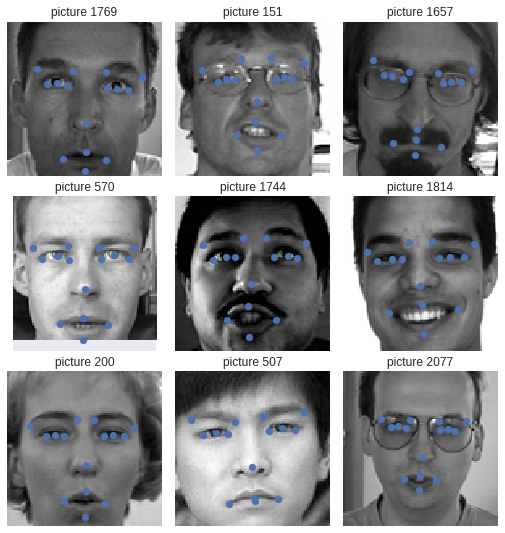

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(hspace=0.13,wspace=0.0001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 9
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(X.shape[0])
    ax = fig.add_subplot(Npicture/3 , 3, count,xticks=[],yticks=[])        
    plot_sample(X[ipic],y[ipic],ax)
    ax.set_title("picture "+ str(ipic))
    count += 1
plt.show()

### Building a Simple Neural network model and plotting it's accuracy against the validation data over a number of epochs

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(200, input_dim=X.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(30))

sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
hist = model.fit(X, y, epochs=100, validation_split=0.2,verbose=False)

Using TensorFlow backend.


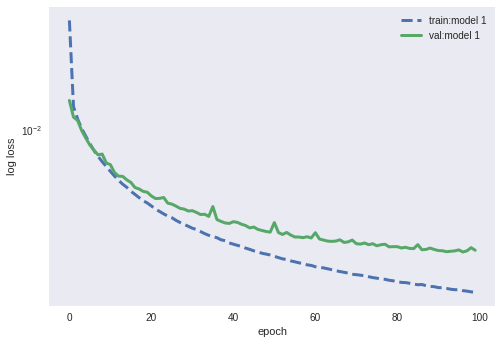

In [58]:
plot_loss(hist.history, "model 1", plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("log loss")
plt.show()

### Predicting with the Simple NN and plotting the data

In [59]:
X_test , _ = load(test=True)
y_test = model.predict(X_test)

     index     0
0  ImageId  1783
1    Image  1783


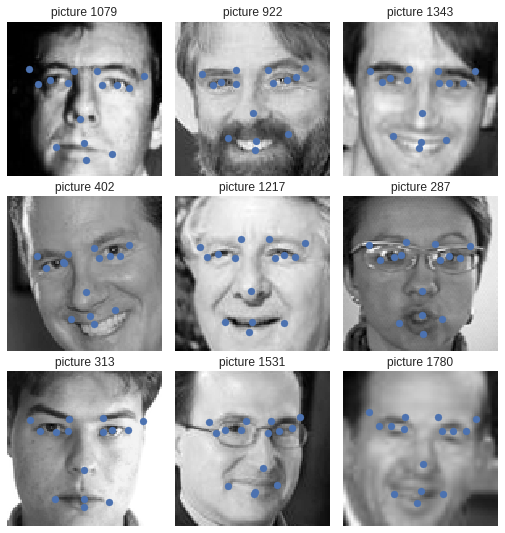

In [60]:
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(hspace=0.13, wspace=0.0001, left=0, right=1, bottom=0, top=1)

Npictue = 9
count = 1
for irow in range(Npictue):
    ipic = np.random.choice(X_test.shape[0])
    ax = fig.add_subplot(Npictue/3, 3, count, xticks=[], yticks=[])
    plot_sample(X_test[ipic], y_test[ipic], ax)
    ax.set_title("picture "+ str(ipic))
    count += 1
plt.show()

### Save and load functions to create a h5 file 
#### Helps when we have to use or train the previously trained model

In [0]:
from keras.models import model_from_json

def save_model(model, name):
    '''
    save model architecture and model weights
    '''
    json_string = model.to_json()
    open(name+'_architecture.json', 'w').write(json_string)
    model.save_weights(name+'_weights.h5')

def load_model(name):
    model = model_from_json(open(name+'_architecture.json').read())
    model.load_weights(name+'_weights.h5')
    return(model)

In [0]:
save_model(model, 'model1')
model = load_model('model1')

### Delete the old data and load a 4D tensor

In [0]:
del X, y, X_test, y_test

In [0]:
def load2d(test=False,cols=None):

    re = load(test, cols)
    
    X = re[0].reshape(-1,96,96,1)
    y = re[1]

    return X, y

In [65]:
X, y = load2d()

                        index     0
0           left_eye_center_x  7039
1           left_eye_center_y  7039
2          right_eye_center_x  7036
3          right_eye_center_y  7036
4     left_eye_inner_corner_x  2271
5     left_eye_inner_corner_y  2271
6     left_eye_outer_corner_x  2267
7     left_eye_outer_corner_y  2267
8    right_eye_inner_corner_x  2268
9    right_eye_inner_corner_y  2268
10   right_eye_outer_corner_x  2268
11   right_eye_outer_corner_y  2268
12   left_eyebrow_inner_end_x  2270
13   left_eyebrow_inner_end_y  2270
14   left_eyebrow_outer_end_x  2225
15   left_eyebrow_outer_end_y  2225
16  right_eyebrow_inner_end_x  2270
17  right_eyebrow_inner_end_y  2270
18  right_eyebrow_outer_end_x  2236
19  right_eyebrow_outer_end_y  2236
20                 nose_tip_x  7049
21                 nose_tip_y  7049
22        mouth_left_corner_x  2269
23        mouth_left_corner_y  2269
24       mouth_right_corner_x  2270
25       mouth_right_corner_y  2270
26     mouth_center_top_lip_

In [66]:
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

X.shape == (2140, 96, 96, 1); X.min == 0.000; X.max == 1.000
y.shape == (2140, 30); y.min == -0.920; y.max == 0.996


### Convolution neural network model function

In [0]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten

def SimpleCNN(withDropout = False): 
    '''
    Dropout is added if WithDropout value is True
    '''
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, activation='relu',  input_shape = (96,96,1)))
    model.add(MaxPooling2D(pool_size=2))
    if withDropout:
        model.add(Dropout(0.1))
    
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Conv2D(128, kernel_size=2, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Flatten())
    
    model.add(Dense(300, activation='relu'))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Dense(300, activation='relu'))
    if withDropout:
        model.add(Dropout(0.1))
        
    model.add(Dense(30))
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return(model)

In [68]:
model2_woDrop = SimpleCNN()
model2_woDrop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
__________

### Using the above CNN to build a 2 models 
#### 1 with dropout and 1 without dropout

In [69]:
%%time
hist2_woDrop = model2_woDrop.fit(X,y,epochs=1000,validation_split=0.2,verbose=False)

CPU times: user 14min 39s, sys: 4min 32s, total: 19min 12s
Wall time: 21min 28s


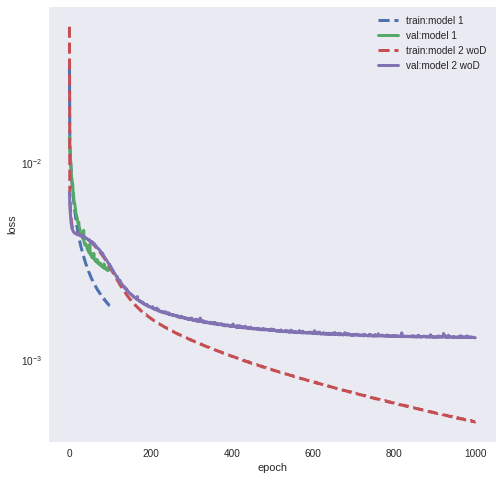

In [70]:
plt.figure(figsize=(8,8))
plot_loss(hist.history,"model 1",plt)
plot_loss(hist2_woDrop.history,"model 2 woD",plt)

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [71]:
%%time
model2_Drop = SimpleCNN(True)

hist2_Drop = model2_Drop.fit(X,y,epochs=1000,validation_split=0.2,verbose=False)

CPU times: user 16min 22s, sys: 5min, total: 21min 23s
Wall time: 24min 28s


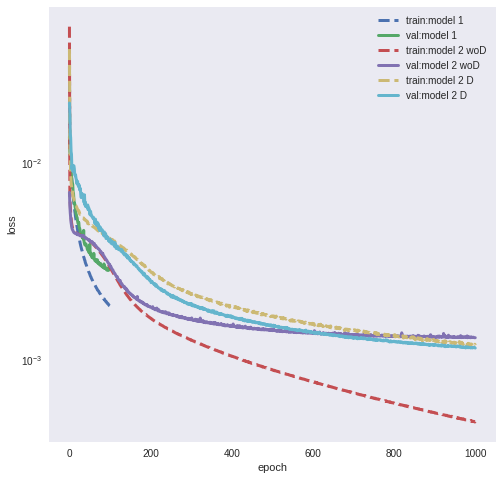

In [72]:
plt.figure(figsize=(8,8))
plot_loss(hist.history,"model 1",plt)
plot_loss(hist2_woDrop.history,"model 2 woD",plt)
plot_loss(hist2_Drop.history,"model 2 D",plt)

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [73]:
sample1,_ = load(test=True)

     index     0
0  ImageId  1783
1    Image  1783


In [74]:
sample2,_ = load2d(test=True)

     index     0
0  ImageId  1783
1    Image  1783


### Predicting the 3 models and simultaneously displayng their output

In [0]:
y_pred1 = model.predict(sample1)

In [0]:
y_pred2_woDrop = model2_woDrop.predict(sample2)

In [0]:
y_pred2_Drop = model2_Drop.predict(sample2)

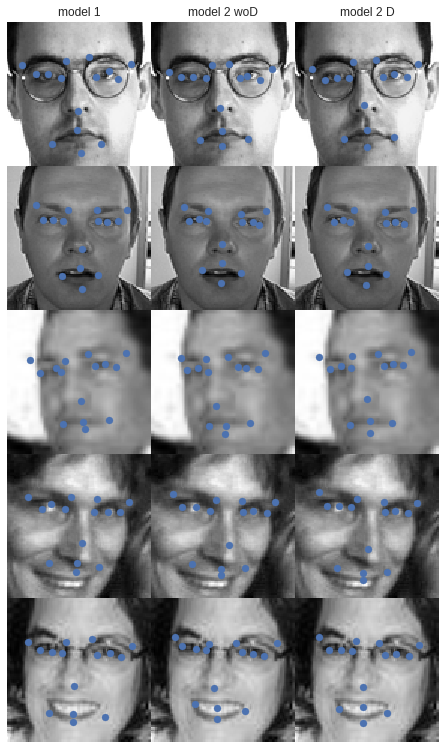

In [78]:
fig = plt.figure(figsize=(6, 10))
fig.subplots_adjust(hspace=0.001,wspace=0.001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 5
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(sample2.shape[0])
    ax = fig.add_subplot(Npicture, 3, count,xticks=[],yticks=[])        
    plot_sample(sample1[ipic],y_pred1[ipic],ax)
    if count < 3:
        ax.set_title("model 1")        
    count += 1
    
    ax = fig.add_subplot(Npicture, 3, count,xticks=[],yticks=[])  
    plot_sample(sample2[ipic],y_pred2_woDrop[ipic],ax)
    if count < 3:
        ax.set_title("model 2 woD")
    count += 1
    
    ax = fig.add_subplot(Npicture, 3, count,xticks=[],yticks=[])  
    plot_sample(sample2[ipic],y_pred2_Drop[ipic],ax)
    if count <= 3:
        ax.set_title("model 2 D")
    count += 1
plt.show()

In [0]:
save_model(model2_woDrop, 'model2_woDrop')

In [0]:
save_model(model2_Drop, 'model2_Drop')

### Custom Data augmentation function
#### This is used because we also want to flip the coordinates of landmarks and not just the images

In [0]:
class DataModifier(object):
    def fit(self,X_,y_):
        return(NotImplementedError)
    
class FlipPic(DataModifier):
    def __init__(self,flip_indices=None):
        if flip_indices is None:
            flip_indices = [
                (0, 2), (1, 3),
                (4, 8), (5, 9), (6, 10), (7, 11),
                (12, 16), (13, 17), (14, 18), (15, 19),
                (22, 24), (23, 25)
                ]
        
        self.flip_indices = flip_indices
        
    def fit(self,X_batch,y_batch):

        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, batch_size//2, replace=False)

        X_batch[indices] = X_batch[indices, :, ::-1,:]
        y_batch[indices, ::2] = y_batch[indices, ::2] * -1

        # flip left eye to right eye, left mouth to right mouth and so on .. 
        for a, b in self.flip_indices:
            y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )
        return X_batch, y_batch


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(1712, 96, 96, 1)


### Plotting flipped images

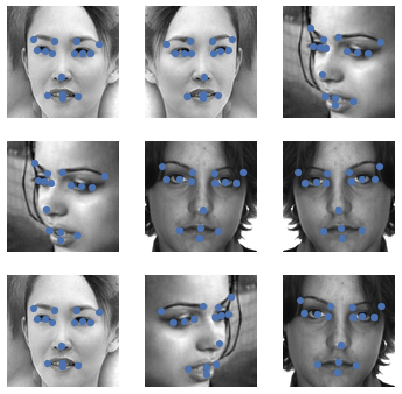

In [83]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator()
modifier = FlipPic()

fig = plt.figure(figsize=(7,7))

count = 1
for batch in generator.flow(X_train[5:8],y_train[5:8]):
    X_batch, y_batch = modifier.fit(*batch)

    ax = fig.add_subplot(3,3, count,xticks=[],yticks=[])  
    plot_sample(X_batch[0],y_batch[0],ax)
    count += 1
    if count == 10:
        break
plt.show()

### Custom fir function which will stop if the back propogation does not lead to decrease in validation loss

In [0]:
def fit(model,modifier,train,validation,
        batch_size=32,epochs=2000,print_every=10,patience=np.Inf):
    '''
    model :        keras model object
    Modifier:      DataModifier() object
    train:         tuple containing two numpy arrays (X_train,y_train)
    validation:    tuple containing two numpy arrays (X_val,y_val)
    patience:      The back propagation algorithm will stop if the val_loss does not decrease 
                   after  epochs
    '''
    
    ## manually write fit method
    X_train,y_train = train
    X_val, y_val    = validation
    
    generator = ImageDataGenerator()
    
    history = {"loss":[],"val_loss":[]}
    for e in range(epochs):
        if e % print_every == 0:
            print('Epoch {:4}:'.format(e)), 
        ## training
        batches = 0
        loss_epoch = []
        for X_batch, y_batch in generator.flow(X_train, y_train, batch_size=batch_size):
            X_batch, y_batch = modifier.fit(X_batch, y_batch)
            hist = model.fit(X_batch, y_batch,verbose=False,epochs=1)
            loss_epoch.extend(hist.history["loss"])
            batches += 1
            if batches >= len(X_train) / batch_size:
                # we need to break the loop by hand because
                # the generator loops indefinitely
                break   
        loss = np.mean(loss_epoch)
        history["loss"].append(loss)
        ## validation
        y_pred = model.predict(X_val)
        val_loss = np.mean((y_pred - y_val)**2)
        history["val_loss"].append(val_loss)
        if e % print_every == 0:
            print("loss - {:6.5f}, val_loss - {:6.5f}".format(loss,val_loss))
        min_val_loss = np.min(history["val_loss"])
        ## Early stopping
        if patience is not np.Inf:
            if np.all(min_val_loss < np.array(history["val_loss"])[-patience:]):
                break
    return(history)

In [85]:
%%time

model3_woDrop = SimpleCNN()
hist3_woDrop = fit(model3_woDrop,modifier,
           train=(X_train,y_train),
           validation=(X_val,y_val),
           batch_size=32,epochs=2000,print_every=100
           )

Epoch    0:
loss - 0.03534, val_loss - 0.00804
Epoch  100:
loss - 0.00283, val_loss - 0.00270
Epoch  200:
loss - 0.00171, val_loss - 0.00171
Epoch  300:
loss - 0.00141, val_loss - 0.00150
Epoch  400:
loss - 0.00123, val_loss - 0.00136
Epoch  500:
loss - 0.00110, val_loss - 0.00128
Epoch  600:
loss - 0.00100, val_loss - 0.00125
Epoch  700:
loss - 0.00092, val_loss - 0.00121
Epoch  800:
loss - 0.00086, val_loss - 0.00115
Epoch  900:
loss - 0.00079, val_loss - 0.00112
Epoch 1000:
loss - 0.00075, val_loss - 0.00111
Epoch 1100:
loss - 0.00070, val_loss - 0.00107
Epoch 1200:
loss - 0.00066, val_loss - 0.00106
Epoch 1300:
loss - 0.00062, val_loss - 0.00104
Epoch 1400:
loss - 0.00059, val_loss - 0.00104
Epoch 1500:
loss - 0.00056, val_loss - 0.00102
Epoch 1600:
loss - 0.00053, val_loss - 0.00102
Epoch 1700:
loss - 0.00051, val_loss - 0.00101
Epoch 1800:
loss - 0.00048, val_loss - 0.00101
Epoch 1900:
loss - 0.00046, val_loss - 0.00099
CPU times: user 31min 25s, sys: 9min, total: 40min 26s
Wall 

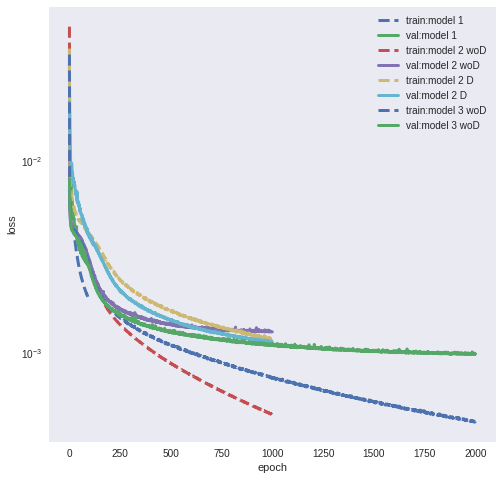

In [86]:
plt.figure(figsize=(8,8))
plot_loss(hist.history,"model 1",plt)
plot_loss(hist2_woDrop.history,"model 2 woD",plt)
plot_loss(hist2_Drop.history,"model 2 D",plt)
plot_loss(hist3_woDrop,"model 3 woD",plt)

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [87]:
%%time
#X, y = load2d()
model3_Drop = SimpleCNN(True)
hist3_Drop = fit(model3_Drop,modifier,
           train=(X_train,y_train),
           validation=(X_val,y_val),
           batch_size=32,epochs=2000,print_every=100
           )

Epoch    0:
loss - 0.04006, val_loss - 0.02050
Epoch  100:
loss - 0.00443, val_loss - 0.00433
Epoch  200:
loss - 0.00320, val_loss - 0.00278
Epoch  300:
loss - 0.00239, val_loss - 0.00198
Epoch  400:
loss - 0.00204, val_loss - 0.00172
Epoch  500:
loss - 0.00181, val_loss - 0.00153
Epoch  600:
loss - 0.00168, val_loss - 0.00141
Epoch  700:
loss - 0.00159, val_loss - 0.00133
Epoch  800:
loss - 0.00149, val_loss - 0.00128
Epoch  900:
loss - 0.00142, val_loss - 0.00123
Epoch 1000:
loss - 0.00136, val_loss - 0.00119
Epoch 1100:
loss - 0.00131, val_loss - 0.00116
Epoch 1200:
loss - 0.00128, val_loss - 0.00113
Epoch 1300:
loss - 0.00121, val_loss - 0.00110
Epoch 1400:
loss - 0.00120, val_loss - 0.00108
Epoch 1500:
loss - 0.00115, val_loss - 0.00106
Epoch 1600:
loss - 0.00112, val_loss - 0.00104
Epoch 1700:
loss - 0.00110, val_loss - 0.00102
Epoch 1800:
loss - 0.00107, val_loss - 0.00100
Epoch 1900:
loss - 0.00104, val_loss - 0.00099
CPU times: user 34min 52s, sys: 9min 56s, total: 44min 48s
W

### Comparing all the models trained uptill now and plotting their predictions simultaneously

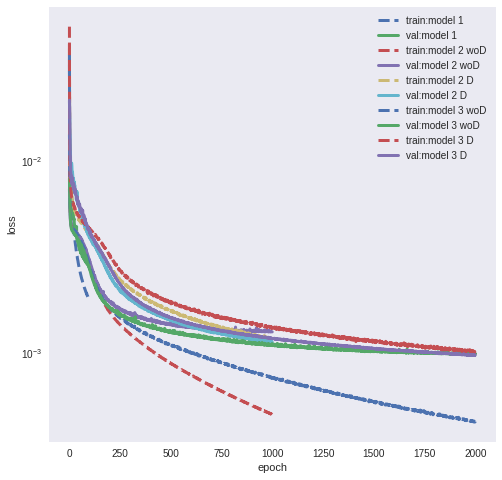

In [88]:
plt.figure(figsize=(8,8))
plot_loss(hist.history,"model 1",plt)
plot_loss(hist2_woDrop.history,"model 2 woD",plt)
plot_loss(hist2_Drop.history,"model 2 D",plt)
plot_loss(hist3_woDrop,"model 3 woD",plt)
plot_loss(hist3_Drop,"model 3 D",plt)

plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [89]:
sample3,_ = load2d(test=True)

     index     0
0  ImageId  1783
1    Image  1783


In [0]:
y_pred3_woDrop = model3_woDrop.predict(sample3)

In [0]:
y_pred3_woDrop = model3_woDrop.predict(sample3)

In [0]:
y_pred3_Drop = model3_Drop.predict(sample3)


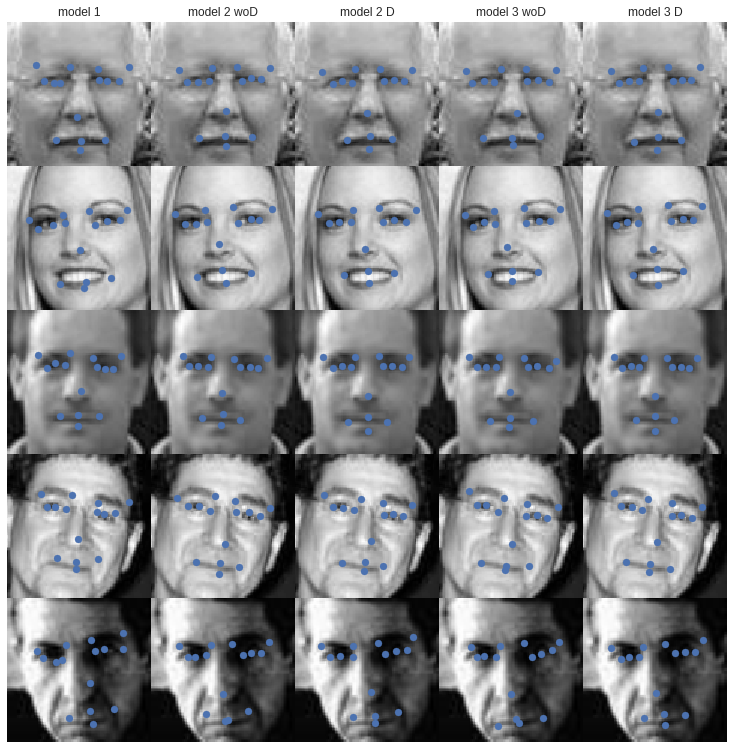

In [93]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.001,wspace=0.001,
                    left=0,right=1,bottom=0, top=1)
Npicture = 5
count = 1
for irow in range(Npicture):
    ipic = np.random.choice(sample2.shape[0])
    ax = fig.add_subplot(Npicture, 5, count,xticks=[],yticks=[])        
    plot_sample(sample1[ipic],y_pred1[ipic],ax)
    if count < 6:
        ax.set_title("model 1")        
    count += 1
    
    ax = fig.add_subplot(Npicture, 5, count,xticks=[],yticks=[])  
    plot_sample(sample2[ipic],y_pred2_woDrop[ipic],ax)
    if count < 6:
        ax.set_title("model 2 woD")
    count += 1
    
    ax = fig.add_subplot(Npicture, 5, count,xticks=[],yticks=[])  
    plot_sample(sample2[ipic],y_pred2_Drop[ipic],ax)
    if count < 6:
        ax.set_title("model 2 D")
    count += 1
    
    ax = fig.add_subplot(Npicture, 5, count,xticks=[],yticks=[])  
    plot_sample(sample3[ipic],y_pred3_woDrop[ipic],ax)
    if count < 6:
        ax.set_title("model 3 woD")
    count += 1
    
    ax = fig.add_subplot(Npicture, 5, count,xticks=[],yticks=[])  
    plot_sample(sample3[ipic],y_pred3_Drop[ipic],ax)
    if count < 6:
        ax.set_title("model 3 D")
    count += 1
plt.show()

In [0]:
save_model(model3_woDrop, 'model3_woDrop')

In [0]:
save_model(model3_Drop, 'model3_Drop')

In [0]:
landmark_nm = read_csv(os.path.expanduser(FTRAIN)).columns[:-1].values

### Preparing submission file

In [0]:
from pandas import DataFrame



df_y_pred2_woDrop = DataFrame(y_pred2_woDrop,columns = landmark_nm)

df_y_pred2_Drop = DataFrame(y_pred2_Drop,columns = landmark_nm)

df_y_pred3_woDrop = DataFrame(y_pred3_woDrop,columns = landmark_nm)

df_y_pred3_Drop = DataFrame(y_pred3_woDrop,columns = landmark_nm)

In [0]:
IdLookup = read_csv(os.path.expanduser(FIdLookup))

def prepare_submission(y_pred4,filename):
    '''
    save a .csv file that can be submitted to kaggle
    '''
    ImageId = IdLookup["ImageId"]
    FeatureName = IdLookup["FeatureName"]
    RowId = IdLookup["RowId"]
    
    submit = []
    for rowId,irow,landmark in zip(RowId,ImageId,FeatureName):
        submit.append([rowId,y_pred4[landmark].iloc[irow-1]])
    
    submit = DataFrame(submit,columns=["RowId","Location"])
    ## adjust the scale 
    submit["Location"] = submit["Location"]*48 + 48
    print(submit.shape)
    loc = filename + ".csv"
    submit.to_csv(loc,index=False)
    print("File is saved at:" +  loc)

In [99]:
prepare_submission(df_y_pred2_Drop,"model2_Drop")

prepare_submission(df_y_pred2_woDrop,"model2_woDrop")

prepare_submission(df_y_pred3_Drop,"model3_Drop")

prepare_submission(df_y_pred3_woDrop,"model3_woDrop")

(27124, 2)
File is saved at:model2_Drop.csv
(27124, 2)
File is saved at:model2_woDrop.csv
(27124, 2)
File is saved at:model3_Drop.csv
(27124, 2)
File is saved at:model3_woDrop.csv
